# Week 8 Seminar Answers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

## Question 1

In [2]:
data = yf.download('SPY', start='2021-03-18', end='2022-03-18')

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-18,394.480011,396.720001,390.750000,391.480011,385.133820,115349100
2021-03-19,389.880005,391.570007,387.149994,389.480011,384.421204,113624500
2021-03-22,390.029999,394.070007,389.970001,392.589996,387.490814,73778600
2021-03-23,391.910004,393.459991,388.660004,389.500000,384.440948,90686600
2021-03-24,391.000000,392.750000,387.470001,387.519989,382.486633,97588600


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-11,428.119995,428.769989,419.529999,420.070007,418.769043,95529600
2022-03-14,420.890015,424.549988,415.790009,417.000000,415.708557,95729200
2022-03-15,419.769989,426.839996,418.420013,426.170013,424.850159,106219100
2022-03-16,429.890015,435.679993,424.799988,435.619995,434.270874,144954800
2022-03-17,433.589996,441.070007,433.190002,441.070007,439.704010,102676900


In [5]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 439.7


## Question 2 

Step 1: Find the log return of Index

In [6]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

Step 2: Calculate its standard deviation and annualised  it 

In [7]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 14.74 %


And the spot value for VIX is 

In [8]:
VIX = yf.download("^VIX", start="2021-03-18", end="2022-03-18")

[*********************100%***********************]  1 of 1 completed


In [9]:
vix = VIX['Adj Close'][-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 25.67 %


## Question 3

In [10]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [11]:
K = 430
T = 1/12
r = 0.0132

In [12]:
call = euro_option_bs(S, K, T, r, vol, 'call')
print('The BS call price is', round(call, 2))

The BS call price is 13.55


In [13]:
put = euro_option_bs(S, K, T, r, vol, 'put')
print('The BS put price is', round(put, 2))

The BS put price is 3.38


## Question 4

In [15]:
SP500 = yf.Ticker('SPY')

In [16]:
opt = SP500.option_chain('2022-04-18')
call1 = opt.calls.lastPrice[opt.calls.strike == K]
print('The Market call price is', float(call1.values))

The Market call price is 18.35


In [17]:
put1 = opt.puts.lastPrice[opt.puts.strike == K]
print('The Market put price is', float(put1.values))

The Market put price is 5.25


## Question 5

In [18]:
call2 = euro_option_bs(S, K, T, r, vix*0.01, 'call')
print('The BS call price is', round(call2,2))

The BS call price is 18.57


In [19]:
put2 = euro_option_bs(S, K, T, r, vix*0.01, 'put')
print('The BS put price is', round(put2,2))

The BS put price is 8.39


The results using the VIX is much better.

## Question 6

In [19]:
K = np.linspace(375,465,4)
T = [1/52, 2/52, 1/12, 2/12, 1/4, 1/2, 1]

In [20]:
call = np.zeros((len(T),len(K)))
for i in range(len(T)):
    for j in range(len(K)):
        call[i,j] = euro_option_bs(S, K[j], T[i], r, vix*0.01, 'call')

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

strike, ttm = np.meshgrid(K, T)

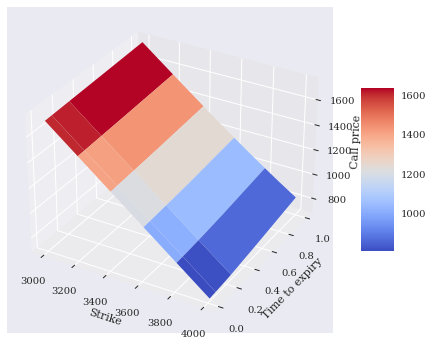

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, call, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike')
ax.set_ylabel('Time to expiry')
ax.set_zlabel('Call price')
fig.colorbar(surf, shrink=0.5, aspect=5);